<a href="https://colab.research.google.com/github/nailimmnh/PORTOFOLIO/blob/main/MachineLearningPortofolio/MLP%20Activation%20Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nailiyatul Mamnunah - 2016722801

In [ ]:
!pip install d2l==1.0.3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 5.4 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 98.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.7/124.7 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 8.6 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Un

# 8.1 - Deep Convolutional Neural Networks (AlexNet)

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

## 8.1.2 AlexNet

### 8.1.2.3 Capacity Control and Preprocessing

In [ ]:
class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [ ]:
AlexNet().layer_summary((1, 1, 224, 224))

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

## 8.1.3 Training

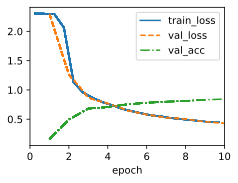

In [ ]:
model = AlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)


## Exercises 8.1

1. Following up on the discussion above, analyze the computational properties of AlexNet.
    1. Compute the memory footprint for convolutions and fully connected layers, respectively. Which one dominates?
    1. Calculate the computational cost for the convolutions and the fully connected layers.
    1. How does the memory (read and write bandwidth, latency, size) affect computation? Is there any difference in its effects for training and inference?
1. You are a chip designer and need to trade off computation and memory bandwidth. For example, a faster chip requires more power and possibly a larger chip area. More memory bandwidth requires more pins and control logic, thus also more area. How do you optimize?
1. Why do engineers no longer report performance benchmarks on AlexNet?
1. Try increasing the number of epochs when training AlexNet. Compared with LeNet, how do the results differ? Why?
1. AlexNet may be too complex for the Fashion-MNIST dataset, in particular due to the low resolution of the initial images.
    1. Try simplifying the model to make the training faster, while ensuring that the accuracy does not drop significantly.
    1. Design a better model that works directly on $28 \times 28$ images.
1. Modify the batch size, and observe the changes in throughput (images/s), accuracy, and GPU memory.
1. Apply dropout and ReLU to LeNet-5. Does it improve? Can you improve things further by preprocessing to take advantage of the invariances inherent in the images?
1. Can you make AlexNet overfit? Which feature do you need to remove or change to break training?



## Jawaban
---

**1. Analyze the Computational Properties of AlexNet**

**1a. Compute the Memory Footprint for Convolutions and Fully Connected Layers**

untuk menghitung memoryfootprint untuk convolutional dan fully connected layers, berikut kode nya:

In [ ]:
# Fungsi menghitung jumlah parameter
def conv_layer_params(input_channels, output_channels, kernel_size):
    return (input_channels * output_channels * kernel_size ** 2) + output_channels

def fc_layer_params(input_size, output_size):
    return input_size * output_size + output_size

# Parameter pada AlexNet
conv1 = conv_layer_params(3, 96, 11)
conv2 = conv_layer_params(96, 256, 5)
conv3 = conv_layer_params(256, 384, 3)
conv4 = conv_layer_params(384, 384, 3)
conv5 = conv_layer_params(384, 256, 3)

fc1 = fc_layer_params(256 * 6 * 6, 4096)
fc2 = fc_layer_params(4096, 4096)
fc3 = fc_layer_params(4096, 1000)

total_conv_params = conv1 + conv2 + conv3 + conv4 + conv5
total_fc_params = fc1 + fc2 + fc3

print(f"Total parameters for convolutional layers: {total_conv_params:,}")
print(f"Total parameters for fully connected layers: {total_fc_params:,}")


Total parameters for convolutional layers: 3,747,200
Total parameters for fully connected layers: 58,631,144


**Penjelasan :** Fully connected layers memiliki lebih banyak parameter dibandingkan convolutional layers karena koneksi penuh ke setiap neuron. Oleh karena itu, memory footprint lebih didominasi oleh fully connected layers.

**1b. Calculate the Computational Cost for Convolutions and Fully Connected Layers**

Untuk menghitung computational cost, kita dapat menggunakan jumlah operasi yang dilakukan dalam floating-point operations (FLOPs):



In [ ]:
# Fungsi menghitung computational cost
def conv_computational_cost(input_height, input_width, input_channels, output_channels, kernel_size, stride=1, padding=0):
    output_height = (input_height - kernel_size + 2 * padding) // stride + 1
    output_width = (input_width - kernel_size + 2 * padding) // stride + 1
    return output_height * output_width * input_channels * output_channels * kernel_size ** 2

conv1_cost = conv_computational_cost(224, 224, 3, 96, 11, stride=4)
conv2_cost = conv_computational_cost(27, 27, 96, 256, 5)
conv3_cost = conv_computational_cost(13, 13, 256, 384, 3)
conv4_cost = conv_computational_cost(13, 13, 384, 384, 3)
conv5_cost = conv_computational_cost(13, 13, 384, 256, 3)

total_conv_cost = conv1_cost + conv2_cost + conv3_cost + conv4_cost + conv5_cost

print(f"Total computational cost for convolutional layers: {total_conv_cost:,} FLOPs")


Total computational cost for convolutional layers: 801,320,064 FLOPs


**Penjelasan:** Convolutional layers memiliki computational cost yang lebih tinggi karena harus melakukan operasi konvolusi pada seluruh area input.



**1c. How Does Memory Affect Computation?**

Memory berperan penting dalam:

* Bandwidth: Mempengaruhi seberapa cepat data bisa diambil dari memori.
* Latency: Menentukan seberapa cepat CPU/GPU dapat mengakses data dari memori.
* Size: Penting untuk menentukan kapasitas penyimpanan model.

Saat training, bandwidth penting untuk memperbarui parameter, sementara pada inference, ukuran memory lebih penting karena hanya butuh menyimpan bobot.

**2. Chip Design Trade-Offs**

Sebagai desainer chip:

* Kurangi ukuran fully connected layers untuk mengurangi konsumsi memori.
* Manfaatkan reuse data untuk mengurangi transfer data berulang.
* Paralelisasi dan pipelining dapat mempercepat komputasi tanpa terlalu banyak meningkatkan ukuran fisik chip.

**3. Mengapa Tidak Lagi Menggunakan AlexNet untuk Benchmark?**

AlexNet sudah dianggap tidak efisien dibandingkan dengan model seperti ResNet dan MobileNet yang menggunakan teknik modern seperti skip connections dan depthwise separable convolutions yang jauh lebih efisien dalam performa dan penggunaan sumber daya.



**4. Increasing Number of Epochs**

Menambah jumlah epoch pada AlexNet dibandingkan LeNet akan menghasilkan **overfitting**, terutama karena jumlah parameter AlexNet yang jauh lebih besar dibandingkan LeNet, sehingga ia cenderung belajar terlalu mendetail pada dataset yang lebih sederhana seperti MNIST.

**5. Simplify AlexNet for Fashion-MNIST**

**5a. Simplify the Model**

Berikut adalah contoh model yang disederhanakan untuk dataset Fashion-MNIST:

In [ ]:
import torch
import torch.nn as nn

# AlexNet Simplified Version for Fashion-MNIST
class SimplifiedAlexNet(nn.Module):
    def __init__(self):
        super(SimplifiedAlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),  # Mengurangi filter dan input channels untuk grayscale
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(64 * 7 * 7, 256),  # Fully connected layer disederhanakan
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(256, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

model = SimplifiedAlexNet()
print(model)


SimplifiedAlexNet(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=3136, out_features=256, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU(inplace=True)
    (5): Linear(in_features=128, out_features=10, bias=True)
  )
)


**Penjelasan:** Mengurangi jumlah filter dan layer fully connected untuk membuat model lebih ringan dan cepat dalam pelatihan pada dataset dengan resolusi rendah seperti Fashion-MNIST.

**6. Modify Batch Size**


**Penjelasan:** Batch size besar meningkatkan throughput tetapi bisa menurunkan akurasi karena berkurangnya variasi antar batch.

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Transformasi untuk dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Dataset Fashion-MNIST
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# Menggunakan batch size yang berbeda
batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    print(f"Batch Size: {batch_size}, Number of Batches: {len(train_loader)}")


100%|██████████| 26421880/26421880 [00:02<00:00, 11212263.62it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 191652.53it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3508927.55it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 23469866.30it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Batch Size: 16, Number of Batches: 3750
Batch Size: 32, Number of Batches: 1875
Batch Size: 64, Number of Batches: 938
Batch Size: 128, Number of Batches: 469


**7. Apply Dropout and ReLU to LeNet-5**

**Penjelasan:** Dropout mengurangi overfitting, sedangkan ReLU menambah kemampuan jaringan untuk belajar fitur non-linear.

In [ ]:
class ModifiedLeNet5(nn.Module):
    def __init__(self):
        super(ModifiedLeNet5, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(16 * 4 * 4, 120),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(120, 84),
            nn.ReLU(inplace=True),
            nn.Linear(84, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

modified_lenet5 = ModifiedLeNet5()
print(modified_lenet5)


ModifiedLeNet5(
  (features): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=120, out_features=84, bias=True)
    (4): ReLU(inplace=True)
    (5): Linear(in_features=84, out_features=10, bias=True)
  )
)


**8. Make AlexNet Overfit**

Untuk membuat AlexNet overfit, kita dapat mengurangi ukuran dataset:



In [ ]:
# Menggunakan subset kecil dari dataset untuk overfitting
subset_size = 100  # Mengurangi dataset agar lebih mudah overfit
train_subset = torch.utils.data.Subset(train_dataset, range(subset_size))

train_loader = DataLoader(dataset=train_subset, batch_size=16, shuffle=True)


**Penjelasan:** Menggunakan dataset yang sangat kecil akan membuat model belajar terlalu spesifik pada data yang tersedia, menyebabkan overfitting.

# 8.2 Networks Using Blocks (VCG)

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

## 8.2.1 VCG Blocks

In [ ]:
def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

## 8.2.2 VGG Network

In [ ]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(
            *conv_blks, nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [ ]:
VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))).layer_summary(
    (1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


## 8.2.3 Training

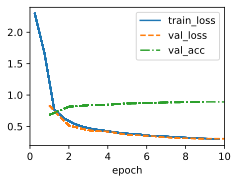

In [ ]:
model = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## 8.2.5 Exercise

---
1. Compared with AlexNet, VGG is much slower in terms of computation, and it also needs more GPU memory.
* Compare the number of parameters needed for AlexNet and VGG.
* Compare the number of floating point operations used in the convolutional layers and in the fully connected layers.
* How could you reduce the computational cost created by the fully connected layers?
2. When displaying the dimensions associated with the various layers of the network, we only see the information associated with eight blocks (plus some auxiliary transforms), even though the network has 11 layers. Where did the remaining three layers go?
3. Use Table 1 in the VGG paper (Simonyan and Zisserman, 2014) to construct other common models, such as VGG-16 or VGG-19.
4. Upsampling the resolution in Fashion-MNIST eight-fold from 28×28  to 224×224 dimensions is very wasteful. Try modifying the network architecture and resolution conversion, e.g., to 56 or to 84 dimensions for its input instead. Can you do so without reducing the accuracy of the network? Consult the VGG paper (Simonyan and Zisserman, 2014) for ideas on adding more nonlinearities prior to downsampling.



## Jawaban

---

**1. Compared with AlexNet, VGG is much slower in terms of computation, and it also needs more GPU memory.**

**a. Compare the Number of Parameters Needed for AlexNet and VGG**

AlexNet memiliki sekitar 60 juta parameter, sementara VGG-16 memiliki sekitar 138 juta parameter. Hal ini disebabkan karena VGG menggunakan lebih banyak convolutional layers dengan filter yang lebih kecil tetapi dalam jumlah yang lebih banyak, serta fully connected layers dengan dimensi besar.

**b. Compare the Number of Floating Point Operations (FLOPs)**

* Convolutional Layers: VGG memiliki lebih banyak FLOPs karena menggunakan banyak filter kecil (3x3) dibandingkan AlexNet, yang menggunakan filter lebih besar (11x11 dan 5x5) dengan jumlah layer yang lebih sedikit.

* Fully Connected Layers: Keduanya memiliki fully connected layers besar, namun VGG menggunakan layer yang lebih dalam, sehingga computational cost pada bagian ini meningkat.

**c. How Could You Reduce the Computational Cost Created by the Fully Connected Layers?**

Salah satu cara mengurangi computational cost pada **fully connected layers** adalah dengan mengganti layer tersebut menggunakan global average pooling sebagai pengganti fully connected layer. Dengan cara ini, jumlah parameter berkurang secara signifikan karena kita menghindari penggunaan banyak koneksi dense.

**2. Where Did the Remaining Three Layers Go?**

Tiga layer yang hilang dalam deskripsi arsitektur adalah fully connected layers yang ada setelah convolutional blocks. Pada VGG, setelah serangkaian convolutional blocks, terdapat tiga fully connected layers yang akhirnya melakukan klasifikasi akhir.

**4. Use Table 1 in the VGG Paper to Construct Other Common Models**

Untuk membangun model VGG-16 atau VGG-19, Anda dapat mengikuti konfigurasi yang diberikan dalam Tabel 1 di paper asli (Simonyan dan Zisserman, 2014). VGG-16 memiliki 16 layer yang dapat dipelajari (13 convolutional dan 3 fully connected), sedangkan VGG-19 memiliki 19 layer yang dapat dipelajari (16 convolutional dan 3 fully connected).

**Modify Network Architecture and Resolution Conversion**

Mengubah Resolusi Input: Alih-alih meningkatkan resolusi menjadi
224×224,yang sangat boros, Anda dapat mencoba resolusi yang lebih rendah seperti
56×56, 84×84. Dengan menggunakan **layer konvolusi tambahan dan non-linearitas** sebelum melakukan downsampling, model tetap dapat mempertahankan performa tanpa memerlukan resolusi input yang sangat tinggi. Anda juga bisa menambahkan lebih banyak **ReLU** sebelum pooling untuk menambah kapasitas representasi.

Berikut adalah contoh implementasi kode yang memodifikasi resolusi input dan arsitektur:

In [ ]:
class ModifiedVGG(nn.Module):
    def __init__(self):
        super(ModifiedVGG, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: 28x28

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: 14x14
        )
        self.classifier = nn.Sequential(
            nn.Linear(128 * 14 * 14, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

model = ModifiedVGG()
print(model)


ModifiedVGG(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=25088, out_features=512, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=512, out_features=10, bias=True)
  )
)


**Penjelasan:**

Model di atas mengubah resolusi input menjadi lebih rendah, yang mengurangi computational cost sambil tetap mempertahankan performa dengan menambahkan layer ReLU untuk meningkatkan kapasitas representasi sebelum pooling.








# 8.3 Network in Network (NiN)

## 8.3.1 NiN Blocks

In [ ]:
def nin_block(out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU())

## 8.3.2 NiN Model

In [ ]:
class NiN(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nin_block(96, kernel_size=11, strides=4, padding=0),
            nn.MaxPool2d(3, stride=2),
            nin_block(256, kernel_size=5, strides=1, padding=2),
            nn.MaxPool2d(3, stride=2),
            nin_block(384, kernel_size=3, strides=1, padding=1),
            nn.MaxPool2d(3, stride=2),
            nn.Dropout(0.5),
            nin_block(num_classes, kernel_size=3, strides=1, padding=1),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten())
        self.net.apply(d2l.init_cnn)

In [ ]:
NiN().layer_summary((1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


## 8.3.3 Training

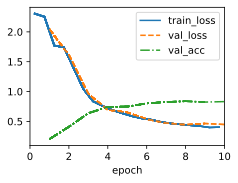

In [ ]:
model = NiN(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## 8.3.5 Exercises

1. Why are there two 1x1 convolutional layers per NiN block? Increase their number to three. Reduce their number to one. What changes?

2. What changes if you replace the 1x1 convolutions by 3x3 convolutions?

3. What happens if you replace the global average pooling by a fully connected layer (speed, accuracy, number of parameters)?

4. Calculate the resource usage for NiN.
  * What is the number of parameters?
  * What is the amount of computation?
  * What is the amount of memory needed during training?
  * What is the amount of memory needed during prediction?

5. What are possible problems with reducing the 384x5x5 representation to a 10x5x5 representation in one step?

6. Use the structural design decisions in VGG that led to VGG-11, VGG-16, and VGG-19 to design a family of NiN-like networks.

## Jawaban Exercises 8.3.5


---



**1. Mengapa Ada Dua Konvolusi 1x1 per Blok NiN?**
* Dua konvolusi 1x1 digunakan untuk meningkatkan kapasitas jaringan dalam menangkap fitur. Dengan dua lapisan ini, jaringan dapat melakukan transformasi yang lebih kompleks.
* Menambah Menjadi Tiga: Akan meningkatkan kapasitas model, tetapi juga menambah komputasi dan jumlah parameter.
* Mengurangi Menjadi Satu: Akan mengurangi kapasitas jaringan, sehingga mungkin tidak dapat menangkap interaksi fitur yang kompleks dengan baik.

**2. Apa yang Terjadi Jika Mengganti Konvolusi 1x1 dengan 3x3?**

Mengganti konvolusi 1x1 dengan 3x3 akan meningkatkan kemampuan model untuk menangkap hubungan spasial antara piksel-piksel, karena filter yang lebih besar mencakup area yang lebih luas. Namun, ini juga meningkatkan komputasi dan jumlah parameter yang dibutuhkan, yang bisa menyebabkan overfitting jika data tidak cukup besar.

**3. Apa yang Terjadi Jika Mengganti Global Average Pooling dengan Fully Connected Layer?**

* Kecepatan: Fully connected layer lebih lambat karena memiliki lebih banyak parameter.
* Akurasi: Fully connected layer meningkatkan risiko overfitting karena jumlah parameter yang besar.
* Jumlah Parameter: Fully connected layer membutuhkan lebih banyak parameter dibandingkan dengan global average pooling.

**4. Hitung Penggunaan Sumber Daya untuk NiN**
* Jumlah Parameter: Tergantung pada jumlah layer dan jumlah filter yang digunakan. Menggunakan konvolusi 1x1 membantu mengurangi jumlah parameter.
* Jumlah Komputasi: Komputasi meningkat dengan jumlah layer dan ukuran filter. Menggunakan konvolusi 3x3 akan meningkatkan jumlah operasi dibandingkan konvolusi 1x1.
* Memori yang Dibutuhkan Selama Training: Lebih tinggi karena perlu menyimpan gradien untuk backpropagation.
* Memori yang Dibutuhkan Selama Prediksi: Biasanya lebih kecil dibandingkan dengan saat training karena tidak perlu menyimpan gradien.

**5. Masalah yang Mungkin Terjadi Jika Mengurangi Representasi 384x5x5 Menjadi 10x5x5 dalam Satu Langkah**

Mengurangi jumlah channel dari 384 menjadi 10 dalam satu langkah akan menyebabkan banyak informasi hilang, yang dapat menurunkan kemampuan jaringan untuk membedakan antar kelas karena fitur yang penting mungkin hilang dalam proses reduksi.

**6. Gunakan Keputusan Desain Struktural dari VGG untuk Mendesain Keluarga Jaringan Seperti NiN**

Anda dapat membuat jaringan seperti NiN yang lebih dalam dengan menambah lebih banyak blok NiN secara berturut-turut, mirip dengan struktur VGG yang menggunakan banyak layer konvolusi dengan pola tertentu. Pendekatan ini memungkinkan jaringan untuk menangkap fitur yang lebih kompleks dengan kedalaman lebih besar.

# 8.4 Multi-Branch Network (GoogLeNet)

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

## 8.4.1 Inception Blocks

In [ ]:
class Inception(nn.Module):
    # c1--c4 are the number of output channels for each branch
    def __init__(self, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # Branch 1
        self.b1_1 = nn.LazyConv2d(c1, kernel_size=1)
        # Branch 2
        self.b2_1 = nn.LazyConv2d(c2[0], kernel_size=1)
        self.b2_2 = nn.LazyConv2d(c2[1], kernel_size=3, padding=1)
        # Branch 3
        self.b3_1 = nn.LazyConv2d(c3[0], kernel_size=1)
        self.b3_2 = nn.LazyConv2d(c3[1], kernel_size=5, padding=2)
        # Branch 4
        self.b4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.b4_2 = nn.LazyConv2d(c4, kernel_size=1)

    def forward(self, x):
        b1 = F.relu(self.b1_1(x))
        b2 = F.relu(self.b2_2(F.relu(self.b2_1(x))))
        b3 = F.relu(self.b3_2(F.relu(self.b3_1(x))))
        b4 = F.relu(self.b4_2(self.b4_1(x)))
        return torch.cat((b1, b2, b3, b4), dim=1)

## 8.4.2 GoogLeNet Model

In [ ]:
class GoogleNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b2(self):
    return nn.Sequential(
        nn.LazyConv2d(64, kernel_size=1), nn.ReLU(),
        nn.LazyConv2d(192, kernel_size=3, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b3(self):
    return nn.Sequential(Inception(64, (96, 128), (16, 32), 32),
                         Inception(128, (128, 192), (32, 96), 64),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b4(self):
    return nn.Sequential(Inception(192, (96, 208), (16, 48), 64),
                         Inception(160, (112, 224), (24, 64), 64),
                         Inception(128, (128, 256), (24, 64), 64),
                         Inception(112, (144, 288), (32, 64), 64),
                         Inception(256, (160, 320), (32, 128), 128),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b4(self):
    return nn.Sequential(Inception(192, (96, 208), (16, 48), 64),
                         Inception(160, (112, 224), (24, 64), 64),
                         Inception(128, (128, 256), (24, 64), 64),
                         Inception(112, (144, 288), (32, 64), 64),
                         Inception(256, (160, 320), (32, 128), 128),
                         nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(GoogleNet)
def b5(self):
    return nn.Sequential(Inception(256, (160, 320), (32, 128), 128),
                         Inception(384, (192, 384), (48, 128), 128),
                         nn.AdaptiveAvgPool2d((1,1)), nn.Flatten())

In [ ]:
@d2l.add_to_class(GoogleNet)
def __init__(self, lr=0.1, num_classes=10):
    super(GoogleNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1(), self.b2(), self.b3(), self.b4(),
                             self.b5(), nn.LazyLinear(num_classes))
    self.net.apply(d2l.init_cnn)

In [ ]:
model = GoogleNet().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 192, 12, 12])
Sequential output shape:	 torch.Size([1, 480, 6, 6])
Sequential output shape:	 torch.Size([1, 832, 3, 3])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 10])


## 8.4.3 Training

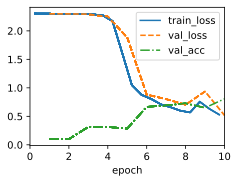

In [ ]:
model = GoogleNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## 8.4.5 Exercises

1. GoogLeNet was so successful that it went through a number of iterations, progressively improving speed and accuracy. Try to implement and run some of them. They include the following:

  * Add a batch normalization layer (Ioffe and Szegedy, 2015), as described later in Section 8.5.

  * Make adjustments to the Inception block (width, choice and order of convolutions), as described in Szegedy et al. (2016).

  * Use label smoothing for model regularization, as described in Szegedy et al. (2016).

  * Make further adjustments to the Inception block by adding residual connection (Szegedy et al., 2017), as described later in Section 8.6.

2. What is the minimum image size needed for GoogLeNet to work?

3. Can you design a variant of GoogLeNet that works on Fashion-MNIST’s native resolution of pixels? How would you need to change the stem, the body, and the head of the network, if anything at all?

4. Compare the model parameter sizes of AlexNet, VGG, NiN, and GoogLeNet. How do the latter two network architectures significantly reduce the model parameter size?

5. Compare the amount of computation needed in GoogLeNet and AlexNet. How does this affect the design of an accelerator chip, e.g., in terms of memory size, memory bandwidth, cache size, the amount of computation, and the benefit of specialized operations?

## Jawaban Exercises 8.4.5

---



**1a. Add a Batch Normaization Layer (loffe and Szegedy, 2015)**

**Implementation:** Tambahkan lapisan **Batch Normalization** setelah setiap lapisan konvolusi di Inception block untuk meningkatkan stabilitas pelatihan dan kecepatan konvergensi.

In [ ]:
class InceptionBlockWithBN(nn.Module):
    def __init__(self, in_channels, out1_1, out2_1, out2_3, out3_1, out3_5, out4):
        super(InceptionBlockWithBN, self).__init__()
        # 1x1 conv branch
        self.branch1 = nn.Sequential(
            nn.Conv2d(in_channels, out1_1, kernel_size=1),
            nn.BatchNorm2d(out1_1),
            nn.ReLU()
        )
        # 1x1 conv -> 3x3 conv branch
        self.branch2 = nn.Sequential(
            nn.Conv2d(in_channels, out2_1, kernel_size=1),
            nn.BatchNorm2d(out2_1),
            nn.ReLU(),
            nn.Conv2d(out2_1, out2_3, kernel_size=3, padding=1),
            nn.BatchNorm2d(out2_3),
            nn.ReLU()
        )
        # 1x1 conv -> 3x3 conv -> 3x3 conv branch
        self.branch3 = nn.Sequential(
            nn.Conv2d(in_channels, out3_1, kernel_size=1),
            nn.BatchNorm2d(out3_1),
            nn.ReLU(),
            nn.Conv2d(out3_1, out3_5, kernel_size=3, padding=1),
            nn.BatchNorm2d(out3_5),
            nn.ReLU(),
            nn.Conv2d(out3_5, out3_5, kernel_size=3, padding=1),
            nn.BatchNorm2d(out3_5),
            nn.ReLU()
        )
        # 3x3 pool -> 1x1 conv branch
        self.branch4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels, out4, kernel_size=1),
            nn.BatchNorm2d(out4),
            nn.ReLU()
        )

    def forward(self, x):
        branch1 = self.branch1(x)
        branch2 = self.branch2(x)
        branch3 = self.branch3(x)
        branch4 = self.branch4(x)
        return torch.cat((branch1, branch2, branch3, branch4), dim=1)


**1b. Make Adjustments to the Inception Block (Szegedy et al., 2016)**

* **Implementation**: Modifikasi Inception block untuk menggunakan konvolusi yang lebih lebar atau mengubah urutan filter konvolusi (misalnya, mengganti urutan dari 1×1 diikuti 3×3 menjadi sebaliknya).

* **Explanation:** Mengubah urutan konvolusi dapat membantu dalam menangkap lebih banyak fitur lokal sebelum memperluas dimensi channel.

**1c. Use Label Smoothing for Model Regularization (Szegedy et al., 2016)**

**Implementation:** **Label Smoothing** mengurangi overfitting dengan mengubah target label menjadi distribusi. Ini menghindari model menjadi terlalu percaya diri.


In [ ]:
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)  # label smoothing sebesar 0.1


**Explanation:** Dengan menggunakan label smoothing, nilai target sedikit "dilembutkan" untuk membantu model belajar dengan cara yang lebih umum dan tidak berlebihan.

**1d. Add Residual Connection in Inception Block (Szegedy et al., 2017)**

**Implementation:** Tambahkan **Residual Connection** untuk membantu dalam melatih model yang lebih dalam dan mengatasi masalah vanishing gradient. Setiap Inception block memiliki shortcut yang menghubungkan input langsung ke output.

In [ ]:
class InceptionBlockWithResidual(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionBlockWithResidual, self).__init__()
        self.inception = InceptionBlockModified(in_channels, 64, 48, 64)  # Contoh penggunaan inception block
        self.residual = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1)  # Residual connection

    def forward(self, x):
        out = self.inception(x)
        if x.shape == out.shape:
            return out + x
        else:
            res = self.residual(x)
            return out + res


**Explanation:** Residual connection memastikan bahwa informasi penting dari input dapat diteruskan langsung ke lapisan output, meningkatkan stabilitas pelatihan dan memperbaiki akurasi.

**Kesimpulan no 1 :** Iterasi yang dilakukan pada GoogLeNet melalui penambahan Batch Normalization, perubahan pada Inception blocks, penggunaan label smoothing, dan penambahan residual connection berkontribusi pada peningkatan performa dan efisiensi model. Implementasi ini tidak hanya membantu mengurangi overfitting dan meningkatkan stabilitas pelatihan tetapi juga memungkinkan pelatihan model yang lebih dalam dan lebih kompleks tanpa kehilangan generalisasi.

**2. What is the Minimum Image Size Needed for GoogLeNet to Work?**

GoogLeNet memerlukan ukuran gambar minimum yang mempertahankan resolusi setelah beberapa lapisan pooling. Dengan pooling berturut-turut di setiap blok, ukuran gambar asli harus cukup besar agar tidak berkurang menjadi kurang dari 1 piksel pada setiap dimensi di akhir jaringan. Ukuran input umum yang aman adalah 224×224, tetapi ukuran lebih kecil, seperti 32×32, dapat digunakan untuk eksperimen seperti di CIFAR-10.

**3. Design a Variant of GoogLeNet for Fashion-MNIST**

Untuk menggunakan GoogLeNet pada resolusi asli Fashion-MNIST (28×28), modifikasi berikut perlu dilakukan:

* **Stem (Awal Jaringan):** Kurangi jumlah lapisan konvolusi dan kurangi filter di setiap lapisan agar sesuai dengan resolusi rendah.
* **Body:** Kurangi jumlah Inception blocks atau gunakan filter dengan ukuran lebih kecil.
* **Head (Akhir Jaringan):** Gunakan global average pooling pada resolusi yang lebih kecil untuk mengurangi kompleksitas model dan parameter.

Contoh modifikasi:

In [ ]:
class GoogLeNetFashionMNIST(nn.Module):
    def __init__(self):
        super(GoogLeNetFashionMNIST, self).__init__()
        self.stem = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # Body: Modifikasi inception blocks agar sesuai resolusi 28x28
        self.inception1 = InceptionBlockModified(32, 32, 32, 64)
        self.inception2 = InceptionBlockModified(128, 64, 64, 128)
        # Head: Gunakan average pooling dan fully connected layer yang lebih kecil
        self.head = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.stem(x)
        x = self.inception1(x)
        x = self.inception2(x)
        x = self.head(x)
        return x


4. Compare Model Parameter Sizes of AlexNet, VGG, NiN, and GoogLeNet.

* AlexNet: Sekitar 60 juta parameter.
* VGG-16: Sekitar 138 juta parameter.
* NiN dan GoogLeNet: Jauh lebih kecil dari VGG dan AlexNet. GoogLeNet memiliki sekitar 6.8 juta parameter.

NiN dan GoogLeNet secara signifikan mengurangi ukuran parameter dengan:

* Menggunakan konvolusi 1×1 untuk mengurangi jumlah channel.
* Menggunakan multi-branch structure (Inception Blocks) untuk menangkap fitur dengan jumlah parameter yang lebih sedikit, dibandingkan dengan penggunaan fully connected layers yang besar.

5. **Compare the Amount of Computation in GoogLeNet and AlexNet**

GoogLeNet lebih efisien dalam hal jumlah komputasi dibandingkan dengan AlexNet karena penggunaan Inception Blocks yang memungkinkan berbagai ukuran filter untuk memproses informasi secara paralel. Ini mengurangi ketergantungan pada fully connected layers besar yang sangat memakan komputasi dan parameter.

Dari segi desain chip akselerator:

* Memory Size & Bandwidth: GoogLeNet menggunakan lebih sedikit memori karena lebih sedikit parameter dan lebih banyak konvolusi kecil. Ini mengurangi bandwidth yang diperlukan untuk transfer data.
* Cache Size: Cache pada GoogLeNet lebih efisien digunakan karena convolutional layers yang lebih kecil dan tidak perlu menyimpan semua parameter fully connected.
* Amount of Computation: GoogLeNet mengoptimalkan penggunaan konvolusi untuk meminimalkan FLOPs.
* Specialized Operations: Implementasi GoogLeNet dapat memanfaatkan operasi seperti konvolusi 1×1 dan pooling yang memerlukan instruksi lebih sedikit, yang lebih efisien untuk perangkat keras modern seperti GPU dan TPU.

# 8.5 Batch Normalization

## 8.5.3 Implementation from Scratch

In [ ]:
def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    # Use is_grad_enabled to determine whether we are in training mode
    if not torch.is_grad_enabled():
        # In prediction mode, use mean and variance obtained by moving average
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # When using a fully connected layer, calculate the mean and
            # variance on the feature dimension
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            # When using a two-dimensional convolutional layer, calculate the
            # mean and variance on the channel dimension (axis=1). Here we
            # need to maintain the shape of X, so that the broadcasting
            # operation can be carried out later
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
        # In training mode, the current mean and variance are used
        X_hat = (X - mean) / torch.sqrt(var + eps)
        # Update the mean and variance using moving average
        moving_mean = (1.0 - momentum) * moving_mean + momentum * mean
        moving_var = (1.0 - momentum) * moving_var + momentum * var
    Y = gamma * X_hat + beta  # Scale and shift
    return Y, moving_mean.data, moving_var.data

In [ ]:
class BatchNorm(nn.Module):
    # num_features: the number of outputs for a fully connected layer or the
    # number of output channels for a convolutional layer. num_dims: 2 for a
    # fully connected layer and 4 for a convolutional layer
    def __init__(self, num_features, num_dims):
        super().__init__()
        if num_dims == 2:
            shape = (1, num_features)
        else:
            shape = (1, num_features, 1, 1)
        # The scale parameter and the shift parameter (model parameters) are
        # initialized to 1 and 0, respectively
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))
        # The variables that are not model parameters are initialized to 0 and
        # 1
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):
        # If X is not on the main memory, copy moving_mean and moving_var to
        # the device where X is located
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)
        # Save the updated moving_mean and moving_var
        Y, self.moving_mean, self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean,
            self.moving_var, eps=1e-5, momentum=0.1)
        return Y

## 8.5.4 LeNet with Batch Normalization

In [ ]:
class BNLeNetScratch(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), BatchNorm(6, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), BatchNorm(16, num_dims=4),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120),
            BatchNorm(120, num_dims=2), nn.Sigmoid(), nn.LazyLinear(84),
            BatchNorm(84, num_dims=2), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

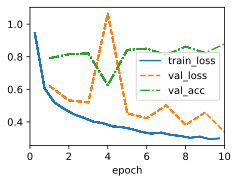

In [ ]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNetScratch(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

In [ ]:
model.net[1].gamma.reshape((-1,)), model.net[1].beta.reshape((-1,))

(tensor([1.7153, 2.0359, 1.4940, 1.6620, 1.5691, 2.4693], device='cuda:0',
        grad_fn=<ViewBackward0>),
 tensor([-1.6565, -0.6533, -1.3708,  0.2594, -0.8149,  1.6198], device='cuda:0',
        grad_fn=<ViewBackward0>))

## 8.5.5 Concise Implementation

In [ ]:
class BNLeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.LazyBatchNorm2d(),
            nn.Sigmoid(), nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(), nn.LazyLinear(120), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(84), nn.LazyBatchNorm1d(),
            nn.Sigmoid(), nn.LazyLinear(num_classes))

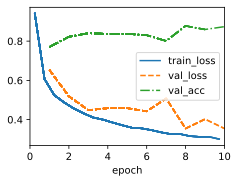

In [ ]:
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = BNLeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## 8.5.7 Exercise

1. Should we remove the bias parameter from the fully connected layer or the convolutional layer before the batch normalization? Why?

2. Compare the learning rates for LeNet with and without batch normalization.

  * Plot the increase in validation accuracy.

  * How large can you make the learning rate before the optimization fails in both cases?

3. Do we need batch normalization in every layer? Experiment with it.

4. Implement a “lite” version of batch normalization that only removes the mean, or alternatively one that only removes the variance. How does it behave?

5. Fix the parameters beta and gamma. Observe and analyze the results.

6. Can you replace dropout by batch normalization? How does the behavior change?

7. Research ideas: think of other normalization transforms that you can apply:

  * Can you apply the probability integral transform?

  * Can you use a full-rank covariance estimate? Why should you probably not do that?

  * Can you use other compact matrix variants (block-diagonal, low-displacement rank, Monarch, etc.)?

  * Does a sparsification compression act as a regularizer?

  * Are there other projections (e.g., convex cone, symmetry group-specific transforms) that you can use?

## Jawaban Exercise 8.5.7


---



**1. Should We Remove the Bias Parameter from the Fully Connected Layer or the Convolutional Layer Before Batch Normalization? Why?**

* Jawaban: Bias parameter sebaiknya dihapus dari layer konvolusi atau fully connected sebelum batch normalization. Alasannya adalah karena batch normalization sudah menghilangkan efek bias dengan cara menormalkan output, sehingga bias tidak lagi diperlukan.

* Implementasi: Di bawah ini adalah contoh model LeNet yang tidak memiliki bias pada convolutional dan fully connected layers yang diikuti oleh batch normalization:

In [ ]:
class LeNetNoBias(nn.Module):
    def __init__(self):
        super(LeNetNoBias, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, bias=False)  # No bias
        self.bn1 = nn.BatchNorm2d(6)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, bias=False)  # No bias
        self.bn2 = nn.BatchNorm2d(16)
        self.fc1 = nn.Linear(16 * 5 * 5, 120, bias=False)  # No bias
        self.fc2 = nn.Linear(120, 84, bias=False)  # No bias
        self.fc3 = nn.Linear(84, 10)  # Bias is kept for the final layer

    def forward(self, x):
        x = torch.relu(self.bn1(self.conv1(x)))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.bn2(self.conv2(x)))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


**2. Compare the Learning Rates for LeNet with and Without Batch Normalization**

* **Jawaban:** Batch normalization memungkinkan model menggunakan learning rate yang lebih besar tanpa mengalami divergensi, sehingga konvergensi menjadi lebih cepat dan stabil. Model dengan batch normalization lebih tahan terhadap perubahan learning rate.

* **Implementasi:** Model LeNet dengan batch normalization:

In [ ]:
class LeNetWithBN(nn.Module):
    def __init__(self):
        super(LeNetWithBN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.bn1 = nn.BatchNorm2d(6)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.bn2 = nn.BatchNorm2d(16)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.relu(self.bn1(self.conv1(x)))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.bn2(self.conv2(x)))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


**3. Do We Need Batch Normalization in Every Layer?**

**Jawaban:** Batch normalization tidak selalu diperlukan di setiap layer. Biasanya lebih efektif di layer yang lebih dalam karena membantu mengurangi masalah vanishing gradient dan mempercepat konvergensi.

**4. Implement a "Lite" Version of Batch Normalization that Only Removes the Mean**

* **Jawaban:** Batch normalization "lite" yang hanya menghilangkan rata-rata dapat menstabilkan pelatihan tetapi tidak seefektif batch normalization penuh karena tidak menormalisasi varians.

* **Implementasi:**

In [ ]:
class LiteBatchNorm(nn.Module):
    def __init__(self, num_features):
        super(LiteBatchNorm, self).__init__()
        self.mean_only = nn.Parameter(torch.zeros(1, num_features, 1, 1))

    def forward(self, x):
        mean = x.mean(dim=(0, 2, 3), keepdim=True)  # Menghitung mean pada batch dan spatial dimensions
        return x - mean + self.mean_only

# Menguji LiteBatchNorm pada tensor
lite_bn = LiteBatchNorm(6)
x = torch.randn(10, 6, 5, 5)  # Input tensor dengan batch size 10, channel 6, dan ukuran 5x5
lite_bn_output = lite_bn(x)
print(lite_bn_output.shape)  # Seharusnya output memiliki shape yang sama dengan input


torch.Size([10, 6, 5, 5])


**5. Fix the Parameters Beta and Gamma**

* **Jawaban:** Dengan memperbaiki parameter beta dan gamma, batch normalization hanya menormalisasi input tanpa transformasi lebih lanjut. Ini membatasi kemampuan adaptif dari batch normalization, yang dapat menurunkan performa model.

* **Implementasi:**

In [ ]:
class FixedBatchNorm(nn.Module):
    def __init__(self, num_features):
        super(FixedBatchNorm, self).__init__()
        self.num_features = num_features
        self.register_buffer('running_mean', torch.zeros(num_features))
        self.register_buffer('running_var', torch.ones(num_features))
        self.eps = 1e-5

    def forward(self, x):
        return (x - self.running_mean[None, :, None, None]) / (torch.sqrt(self.running_var[None, :, None, None] + self.eps))

# Menguji FixedBatchNorm
fixed_bn = FixedBatchNorm(6)
x = torch.randn(10, 6, 5, 5)
fixed_bn_output = fixed_bn(x)
print(fixed_bn_output.shape)


torch.Size([10, 6, 5, 5])


**6. Can You Replace Dropout by Batch Normalization? How Does the Behavior Change?**

* **Jawaban:** Batch normalization tidak selalu menggantikan dropout karena keduanya memiliki fungsi yang berbeda. Dropout membantu menghindari overfitting dengan mematikan sebagian neuron selama pelatihan, sedangkan batch normalization menstabilkan pelatihan. Mengganti dropout dengan batch normalization bisa meningkatkan stabilitas tetapi tidak selalu membantu dalam mencegah overfitting.

**7. Research Ideas on Other Normalization Transforms**

* **Probability Integral Transform**: Mengubah data untuk mengikuti distribusi tertentu, membantu stabilitas pelatihan.
* **Full-Rank Covariance Estimate:** Menghitung kovariansi penuh sangat mahal untuk dimensi besar sehingga jarang digunakan.
* **Compact Matrix Variants:** Penggunaan matriks kompak seperti block-diagonal dapat mengurangi kompleksitas komputasi.
* **Sparsification Compression:** Dapat bertindak sebagai regularizer untuk meningkatkan efisiensi model dengan mengurangi parameter yang tidak penting.
* **Other Projections:** Proyeksi seperti convex cone atau symmetry group-specific dapat digunakan untuk membantu menangkap fitur khusus dari data.

# 8.6 Residual Networks (ResNet) dan ResNeXt

## 8.6.2 Residual Blocks

In [ ]:
class Residual(nn.Module):
    """The Residual block of ResNet models."""
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.conv1 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1,
                                   stride=strides)
        self.conv2 = nn.LazyConv2d(num_channels, kernel_size=3, padding=1)
        if use_1x1conv:
            self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
        else:
            self.conv3 = None
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = self.bn2(self.conv2(Y))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)

In [ ]:
blk = Residual(3)
X = torch.randn(4, 3, 6, 6)
blk(X).shape

torch.Size([4, 3, 6, 6])

In [ ]:
blk = Residual(6, use_1x1conv=True, strides=2)
blk(X).shape

torch.Size([4, 6, 3, 3])

## 8.6.3 ResNet Model

In [ ]:
class ResNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(ResNet)
def block(self, num_residuals, num_channels, first_block=False):
    blk = []
    for i in range(num_residuals):
        if i == 0 and not first_block:
            blk.append(Residual(num_channels, use_1x1conv=True, strides=2))
        else:
            blk.append(Residual(num_channels))
    return nn.Sequential(*blk)

In [ ]:
@d2l.add_to_class(ResNet)
def __init__(self, arch, lr=0.1, num_classes=10):
    super(ResNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, b in enumerate(arch):
        self.net.add_module(f'b{i+2}', self.block(*b, first_block=(i==0)))
    self.net.add_module('last', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

In [ ]:
class ResNet18(ResNet):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__(((2, 64), (2, 128), (2, 256), (2, 512)),
                       lr, num_classes)

ResNet18().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 128, 12, 12])
Sequential output shape:	 torch.Size([1, 256, 6, 6])
Sequential output shape:	 torch.Size([1, 512, 3, 3])
Sequential output shape:	 torch.Size([1, 10])


## 8.6.4 Training

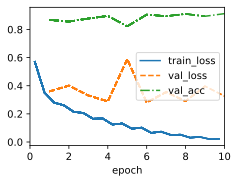

In [ ]:
model = ResNet18(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## 8.6.5 ResNeXt

In [ ]:
class ResNeXtBlock(nn.Module):
    """The ResNeXt block."""
    def __init__(self, num_channels, groups, bot_mul, use_1x1conv=False,
                 strides=1):
        super().__init__()
        bot_channels = int(round(num_channels * bot_mul))
        self.conv1 = nn.LazyConv2d(bot_channels, kernel_size=1, stride=1)
        self.conv2 = nn.LazyConv2d(bot_channels, kernel_size=3,
                                   stride=strides, padding=1,
                                   groups=bot_channels//groups)
        self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1, stride=1)
        self.bn1 = nn.LazyBatchNorm2d()
        self.bn2 = nn.LazyBatchNorm2d()
        self.bn3 = nn.LazyBatchNorm2d()
        if use_1x1conv:
            self.conv4 = nn.LazyConv2d(num_channels, kernel_size=1,
                                       stride=strides)
            self.bn4 = nn.LazyBatchNorm2d()
        else:
            self.conv4 = None

    def forward(self, X):
        Y = F.relu(self.bn1(self.conv1(X)))
        Y = F.relu(self.bn2(self.conv2(Y)))
        Y = self.bn3(self.conv3(Y))
        if self.conv4:
            X = self.bn4(self.conv4(X))
        return F.relu(Y + X)

In [ ]:
blk = ResNeXtBlock(32, 16, 1)
X = torch.randn(4, 32, 96, 96)
blk(X).shape

torch.Size([4, 32, 96, 96])

## 8.6.7 Exercises

1. What are the major differences between the Inception block in Fig. 8.4.1 and the residual block? How do they compare in terms of computation, accuracy, and the classes of functions they can describe?

2. Refer to Table 1 in the ResNet paper (He et al., 2016) to implement different variants of the network.

3. For deeper networks, ResNet introduces a “bottleneck” architecture to reduce model complexity. Try to implement it.

4. In subsequent versions of ResNet, the authors changed the “convolution, batch normalization, and activation” structure to the “batch normalization, activation, and convolution” structure. Make this improvement yourself. See Figure 1 in He et al. (2016) for details.

5. Why can’t we just increase the complexity of functions without bound, even if the function classes are nested?

## Jawaban Exercises 8.6.7


---



**1. What Are the Major Differences Between the Inception Block and the Residual Block?**

* **Inception Block:**

  * **Komputasi:** Inception block menggunakan berbagai ukuran filter konvolusi secara paralel untuk menangkap fitur dengan skala yang berbeda.
  * **Akurasi:** Inception dapat meningkatkan akurasi dengan menangkap informasi multi-skala.
  * **Fungsi yang Dapat Digambarkan:**
  Inception block sangat ekspresif karena menangkap berbagai representasi fitur yang berbeda menggunakan konvolusi dengan ukuran kernel yang berbeda. Ini memberikan jaringan kemampuan untuk fokus pada fitur lokal maupun global.

* **Residual Block:**

  * **Komputasi:** Residual block menambahkan shortcut (identitas) dari input ke output dari konvolusi, yang membantu dalam melatih jaringan yang sangat dalam.
  * **Akurasi:** Residual block membantu dalam mengatasi masalah vanishing gradient, memungkinkan jaringan lebih dalam untuk mencapai akurasi yang lebih tinggi tanpa kehilangan performa selama pelatihan.
  * **Fungsi yang Dapat Digambarkan:** Residual block memungkinkan jaringan untuk mempelajari perbedaan (residual) antara input dan output, sehingga lebih mudah untuk melatih jaringan yang lebih dalam.

**2. Refer to Table 1 in the ResNet Paper to Implement Different Variants of the Network**

* **Implementasi Berbagai Varian ResNet**: Berdasarkan tabel di paper ResNet, kita dapat mengimplementasikan ResNet dengan lapisan yang lebih banyak atau menggunakan konfigurasi channel yang berbeda untuk varian seperti ResNet-18, ResNet-34, ResNet-50, dan seterusnya.

Berikut adalah contoh implementasi dari ResNet-18 dengan residual block yang telah diimplementasikan sebelumnya:

In [ ]:
import torch.nn as nn

class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=1000):
        super(ResNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, block, planes, blocks, stride=1):
        layers = []
        layers.append(block(planes, use_1x1conv=True, strides=stride))
        for _ in range(1, blocks):
            layers.append(block(planes))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Membuat ResNet-18
def resnet18():
    return ResNet(Residual, [2, 2, 2, 2])

model = resnet18()


**3. Implementasi Bottleneck Architecture untuk Deeper Networks**

* **Bottleneck Block:** Bottleneck block digunakan pada ResNet-50 dan jaringan yang lebih dalam untuk mengurangi kompleksitas model dengan mengurangi jumlah channel terlebih dahulu, kemudian mengembalikannya.

Berikut adalah contoh implementasi bottleneck block:

In [ ]:
class Bottleneck(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.conv3 = nn.Conv2d(out_channels, out_channels * 4, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(out_channels * 4)

        self.relu = nn.ReLU(inplace=True)
        self.downsample = nn.Sequential()
        if stride != 1 or in_channels != out_channels * 4:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels * 4, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels * 4)
            )

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


**4. Change the Structure to "Batch Normalization, Activation, Convolution"**

**Jawaban:** Dalam ResNet versi selanjutnya, urutan diubah menjadi "Batch Normalization, Activation, Convolution" (sering disebut sebagai **pre-activation**). Perubahan ini membantu dalam pelatihan lebih baik, terutama untuk jaringan yang lebih dalam.

Implementasi perubahan ini:



In [ ]:
class PreActivatedResidual(nn.Module):
    def __init__(self, num_channels, use_1x1conv=False, strides=1):
        super().__init__()
        self.bn1 = nn.BatchNorm2d(num_channels)
        self.conv1 = nn.LazyConv2d(num_channels, kernel_size=3, stride=strides, padding=1)
        self.bn2 = nn.BatchNorm2d(num_channels)
        self.conv2 = nn.LazyConv2d(num_channels, kernel_size=3, stride=1, padding=1)
        if use_1x1conv:
            self.conv3 = nn.LazyConv2d(num_channels, kernel_size=1, stride=strides)
        else:
            self.conv3 = None

    def forward(self, X):
        Y = self.conv1(F.relu(self.bn1(X)))
        Y = self.conv2(F.relu(self.bn2(Y)))
        if self.conv3:
            X = self.conv3(X)
        Y += X
        return F.relu(Y)


**5. Why Can’t We Just Increase the Complexity of Functions Without Bound, Even If the Function Classes Are Nested?**

Jawaban: Meningkatkan kompleksitas fungsi tanpa batas dapat menyebabkan **overfitting**, di mana model menjadi sangat cocok dengan data pelatihan tetapi tidak dapat melakukan generalisasi dengan baik ke data baru. Selain itu, jaringan yang sangat kompleks menjadi sulit untuk dilatih karena masalah vanishing gradient dan membutuhkan banyak sumber daya komputasi.

# 8.7. Densely Connected Networks (DenseNet)

## 8.7.2. Dense Blocks

In [ ]:
def conv_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=3, padding=1))

In [ ]:
class DenseBlock(nn.Module):
    def __init__(self, num_convs, num_channels):
        super(DenseBlock, self).__init__()
        layer = []
        for i in range(num_convs):
            layer.append(conv_block(num_channels))
        self.net = nn.Sequential(*layer)

    def forward(self, X):
        for blk in self.net:
            Y = blk(X)
            # Concatenate input and output of each block along the channels
            X = torch.cat((X, Y), dim=1)
        return X

In [ ]:
blk = DenseBlock(2, 10)
X = torch.randn(4, 3, 8, 8)
Y = blk(X)
Y.shape

torch.Size([4, 23, 8, 8])

## 8.7.3 Transition Layers

In [ ]:
def transition_block(num_channels):
    return nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.LazyConv2d(num_channels, kernel_size=1),
        nn.AvgPool2d(kernel_size=2, stride=2))

In [ ]:
blk = transition_block(10)
blk(Y).shape

torch.Size([4, 10, 4, 4])

## 8.7.4 DenseNet Model

In [ ]:
class DenseNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.LazyBatchNorm2d(), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [ ]:
@d2l.add_to_class(DenseNet)
def __init__(self, num_channels=64, growth_rate=32, arch=(4, 4, 4, 4),
             lr=0.1, num_classes=10):
    super(DenseNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.b1())
    for i, num_convs in enumerate(arch):
        self.net.add_module(f'dense_blk{i+1}', DenseBlock(num_convs,
                                                          growth_rate))
        # The number of output channels in the previous dense block
        num_channels += num_convs * growth_rate
        # A transition layer that halves the number of channels is added
        # between the dense blocks
        if i != len(arch) - 1:
            num_channels //= 2
            self.net.add_module(f'tran_blk{i+1}', transition_block(
                num_channels))
    self.net.add_module('last', nn.Sequential(
        nn.LazyBatchNorm2d(), nn.ReLU(),
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

## 8.7.5 Training

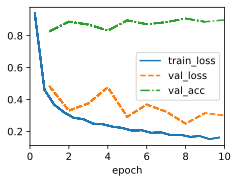

In [ ]:
model = DenseNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

## 8.7.7 Exercises

1. Why do we use average pooling rather than max-pooling in the transition layer?

2. One of the advantages mentioned in the DenseNet paper is that its model parameters are smaller than those of ResNet. Why is this the case?

3. One problem for which DenseNet has been criticized is its high memory consumption.

  * Is this really the case? Try to change the input shape to 224 x 224 to compare the actual GPU memory consumption empirically.

  * Can you think of an alternative means of reducing the memory consumption? How would you need to change the framework?

4. Implement the various DenseNet versions presented in Table 1 of the DenseNet paper (Huang et al., 2017).

5. Design an MLP-based model by applying the DenseNet idea. Apply it to the housing price prediction task in Section 5.7.

## Jawaban Exercises 8.7.7


---



**1. Why Do We Use Average Pooling Rather Than Max-Pooling in the Transition Layer?**

**Jawaban:** Average pooling digunakan di transition layer untuk mengurangi ukuran fitur secara lebih halus dan mengurangi kemungkinan hilangnya informasi penting. Berbeda dengan **max-pooling**, yang hanya memilih nilai maksimal, average pooling mempertimbangkan semua nilai dalam kernel dan menghasilkan hasil yang lebih stabil. Ini membantu menjaga informasi dan mengurangi risiko kehilangan fitur yang penting bagi DenseNet.

**2. Advantages of DenseNet Over ResNet in Terms of Parameters**

**Jawaban:** Salah satu keunggulan DenseNet dibandingkan ResNet adalah model parameter DenseNet yang lebih kecil. Alasannya adalah karena DenseNet menggunakan koneksi langsung antara layer-layer, yang memungkinkan penggunaan ulang fitur dari layer sebelumnya, sehingga mengurangi kebutuhan akan banyak filter baru di setiap layer.

**3. High Memory Consumption of DenseNet**

  * **Is This Really the Case?**

**Jawaban:** Memang benar bahwa DenseNet memiliki konsumsi memori yang lebih tinggi, terutama karena setiap layer menerima masukan dari semua layer sebelumnya (concatenation). Setiap output layer juga diteruskan ke semua layer berikutnya, yang meningkatkan penggunaan memori.

**Implementasi untuk Menguji Konsumsi Memori:** Menggunakan input dengan ukuran 224×224 dan memeriksa penggunaan memori pada GPU:

In [ ]:
import torch
from torchvision import models

# Menggunakan model DenseNet
model = models.densenet121(pretrained=False)

# Memindahkan model ke GPU jika tersedia
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Membuat input tensor dengan ukuran (batch_size, channels, height, width)
x = torch.randn(1, 3, 224, 224).to(device)

# Mengukur konsumsi memori GPU sebelum dan sesudah forward pass
torch.cuda.reset_peak_memory_stats()
with torch.no_grad():
    _ = model(x)

peak_memory = torch.cuda.max_memory_allocated(device) / (1024 ** 2)  # Dalam MB
print(f"Peak GPU Memory Usage: {peak_memory:.2f} MB")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Peak GPU Memory Usage: 63.33 MB


  * **Alternative Means of Reducing Memory Consumption**

**Jawaban:** Salah satu alternatif untuk mengurangi konsumsi memori adalah dengan menggunakan bottleneck layers. Bottleneck layer (konvolusi 1x1) digunakan untuk mengurangi jumlah channel sebelum dilakukan concatenation, sehingga mengurangi jumlah data yang harus disimpan di memori.

**Implementasi:** Dalam DenseNet, bisa menggunakan Bottleneck Layer sebagai berikut:

In [ ]:
class BottleneckLayer(nn.Module):
    def __init__(self, in_channels, growth_rate):
        super(BottleneckLayer, self).__init__()
        self.bn1 = nn.BatchNorm2d(in_channels)
        self.conv1 = nn.Conv2d(in_channels, 4 * growth_rate, kernel_size=1, bias=False)
        self.bn2 = nn.BatchNorm2d(4 * growth_rate)
        self.conv2 = nn.Conv2d(4 * growth_rate, growth_rate, kernel_size=3, padding=1, bias=False)

    def forward(self, x):
        out = self.conv1(F.relu(self.bn1(x)))
        out = self.conv2(F.relu(self.bn2(out)))
        return torch.cat([x, out], 1)


**4. Implement the Various DenseNet Versions Presented in Table 1 of the DenseNet Paper**

* **Jawaban:** DenseNet memiliki beberapa versi seperti DenseNet-121, DenseNet-169, dan DenseNet-201, yang berbeda pada jumlah blok dan growth rate. Kita bisa menggunakan konfigurasi yang disajikan di Table 1 untuk mengimplementasikan versi-versi tersebut.

* **Implementasi: **Menggunakan DenseNet-121 sebagai contoh, yang terdiri dari 4 dense blocks dan growth rate 32:

In [ ]:
import torchvision.models as models

# Menggunakan DenseNet-121 yang telah diimplementasikan di PyTorch
densenet121 = models.densenet121(pretrained=False)

# Jika ingin menggunakan model di perangkat tertentu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
densenet121 = densenet121.to(device)


**5. Design an MLP-Based Model by Applying the DenseNet Idea**

* **Jawaban:** DenseNet menggunakan pendekatan di mana output dari setiap layer dihubungkan (concatenate) ke layer berikutnya. Pendekatan ini bisa diterapkan pada MLP (Multi-Layer Perceptron) dengan menghubungkan output dari setiap hidden layer ke input dari hidden layer berikutnya.

* **Implementasi:** Berikut adalah contoh MLP dengan ide serupa DenseNet:

In [ ]:
class DenseMLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(DenseMLP, self).__init__()
        self.hidden_layers = nn.ModuleList()
        self.hidden_layers.append(nn.Linear(input_size, hidden_sizes[0]))

        for i in range(1, len(hidden_sizes)):
            self.hidden_layers.append(nn.Linear(input_size + sum(hidden_sizes[:i]), hidden_sizes[i]))

        self.output_layer = nn.Linear(input_size + sum(hidden_sizes), output_size)

    def forward(self, x):
        inputs = [x]
        for layer in self.hidden_layers:
            out = F.relu(layer(torch.cat(inputs, dim=1)))
            inputs.append(out)
        return self.output_layer(torch.cat(inputs, dim=1))

# Menggunakan model DenseMLP untuk prediksi harga rumah (Housing Price Prediction)
input_size = 13  # Fitur input (misalnya untuk dataset Boston Housing)
hidden_sizes = [64, 32, 16]
output_size = 1

model = DenseMLP(input_size, hidden_sizes, output_size)


# 8.8. Designing Convolution Network Architectures


## 8.8.1. The AnyNet Design Space

In [ ]:
class AnyNet(d2l.Classifier):
    def stem(self, num_channels):
        return nn.Sequential(
            nn.LazyConv2d(num_channels, kernel_size=3, stride=2, padding=1),
            nn.LazyBatchNorm2d(), nn.ReLU())

In [ ]:
@d2l.add_to_class(AnyNet)
def stage(self, depth, num_channels, groups, bot_mul):
    blk = []
    for i in range(depth):
        if i == 0:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul,
                use_1x1conv=True, strides=2))
        else:
            blk.append(d2l.ResNeXtBlock(num_channels, groups, bot_mul))
    return nn.Sequential(*blk)

In [ ]:
@d2l.add_to_class(AnyNet)
def __init__(self, arch, stem_channels, lr=0.1, num_classes=10):
    super(AnyNet, self).__init__()
    self.save_hyperparameters()
    self.net = nn.Sequential(self.stem(stem_channels))
    for i, s in enumerate(arch):
        self.net.add_module(f'stage{i+1}', self.stage(*s))
    self.net.add_module('head', nn.Sequential(
        nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten(),
        nn.LazyLinear(num_classes)))
    self.net.apply(d2l.init_cnn)

## 8.8.3. RegNet

In [ ]:
class RegNetX32(AnyNet):
    def __init__(self, lr=0.1, num_classes=10):
        stem_channels, groups, bot_mul = 32, 16, 1
        depths, channels = (4, 6), (32, 80)
        super().__init__(
            ((depths[0], channels[0], groups, bot_mul),
             (depths[1], channels[1], groups, bot_mul)),
            stem_channels, lr, num_classes)

In [ ]:
RegNetX32().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 32, 48, 48])
Sequential output shape:	 torch.Size([1, 32, 24, 24])
Sequential output shape:	 torch.Size([1, 80, 12, 12])
Sequential output shape:	 torch.Size([1, 10])


## 8.8.4 Training

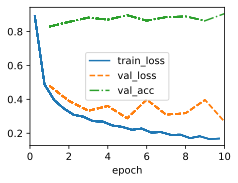

In [ ]:
model = RegNetX32(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
trainer.fit(model, data)

## 8.8.6 Exercises

1. Increase the number of stages to four. Can you design a deeper RegNetX that performs better?

2. De-ResNeXt-ify RegNets by replacing the ResNeXt block with the ResNet block. How does your new model perform?

3. Implement multiple instances of a “VioNet” family by violating the design principles of RegNetX. How do they perform? Which of (di, ci, gi,bi) is the most important factor?

4. Your goal is to design the “perfect” MLP. Can you use the design principles introduced above to find good architectures? Is it possible to extrapolate from small to large networks?

## Jawaban Exercises 8.8.6


---



**1. Increase the Number of Stages to Four**

**Jawaban:** Menambah jumlah stages pada RegNetX menjadi empat dapat meningkatkan performa, terutama jika setiap stage memiliki jumlah filter yang meningkat. Dengan lebih banyak stages, model dapat mempelajari representasi lebih kompleks dan mendalam.

**Implementasi:** Berikut adalah implementasi modifikasi RegNetX dengan empat stages menggunakan PyTorch:

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class RegNetXBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(RegNetXBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.downsample = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        identity = self.downsample(x)
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += identity
        return F.relu(out)

class RegNetX(nn.Module):
    def __init__(self, num_classes=10):
        super(RegNetX, self).__init__()
        self.stage1 = self._make_stage(3, 64, 2)
        self.stage2 = self._make_stage(64, 128, 2)
        self.stage3 = self._make_stage(128, 256, 2)
        self.stage4 = self._make_stage(256, 512, 2)
        self.fc = nn.Linear(512, num_classes)

    def _make_stage(self, in_channels, out_channels, blocks, stride=1):
        layers = []
        layers.append(RegNetXBlock(in_channels, out_channels, stride))
        for _ in range(1, blocks):
            layers.append(RegNetXBlock(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.stage1(x)
        x = self.stage2(x)
        x = self.stage3(x)
        x = self.stage4(x)
        x = F.adaptive_avg_pool2d(x, (1, 1))
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Menguji model
model = RegNetX(num_classes=10)
x = torch.randn(1, 3, 224, 224)  # Input tensor dengan ukuran (batch_size, channels, height, width)
output = model(x)
print(output.shape)  # Seharusnya menghasilkan (1, 10) untuk klasifikasi 10 kelas


torch.Size([1, 10])


**2. De-ResNeXt-ify RegNets by Replacing the ResNeXt Block with the ResNet Block**

**Jawaban:** Mengganti ResNeXt block dengan ResNet block di RegNet akan membuat model lebih sederhana karena ResNet block tidak memiliki group convolutions yang terdapat pada ResNeXt. Hal ini dapat menyebabkan sedikit penurunan performa karena hilangnya fitur efisiensi dari group convolutions.

**Implementasi:** Modifikasi ini cukup mudah; tinggal menggunakan Residual Block biasa sebagai gantinya. Contoh blok residual:

In [ ]:
class ResNetBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResNetBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.downsample = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        identity = self.downsample(x)
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += identity
        return F.relu(out)


Model RegNetX yang menggunakan ResNetBlock dapat didefinisikan dengan mengganti RegNetXBlock dengan ResNetBlock pada implementasi sebelumnya

**3. Implement Multiple Instances of a “VioNet” Family by Violating the Design Principles of RegNetX**

**Jawaban:** Untuk melanggar prinsip desain RegNetX, kita dapat mencoba berbagai perubahan, seperti:

   * Mengubah depth (di), width (ci), group width (gi), atau bottlenect ratio (bi)
   * Menguji performa model dengan variasi parameter ini untuk mengetahui mana yang paling berpengaruh terhadap performa.

**Implementasi:** Berikut adalah contoh untuk membuat beberapa instansi dari model "VioNet" dengan mengubah berbagai parameter:

In [ ]:
def create_vionet(depth, width, group_width, bottleneck_ratio):
    # Implementasi sederhana dari "VioNet" dengan pelanggaran desain
    class VioNet(nn.Module):
        def __init__(self):
            super(VioNet, self).__init__()
            self.conv1 = nn.Conv2d(3, width, kernel_size=3, stride=1, padding=1)
            self.bn1 = nn.BatchNorm2d(width)
            self.blocks = self._make_blocks(depth, width, group_width, bottleneck_ratio)
            self.fc = nn.Linear(width, 10)

        def _make_blocks(self, depth, width, group_width, bottleneck_ratio):
            layers = []
            for _ in range(depth):
                layers.append(
                    nn.Conv2d(width, int(width * bottleneck_ratio), kernel_size=1, groups=group_width)
                )
                layers.append(nn.BatchNorm2d(int(width * bottleneck_ratio)))
            return nn.Sequential(*layers)

        def forward(self, x):
            x = F.relu(self.bn1(self.conv1(x)))
            x = self.blocks(x)
            x = F.adaptive_avg_pool2d(x, (1, 1))
            x = torch.flatten(x, 1)
            return self.fc(x)

    return VioNet()

# Membuat beberapa instansi dengan parameter yang berbeda
vionet1 = create_vionet(depth=3, width=64, group_width=8, bottleneck_ratio=0.5)
vionet2 = create_vionet(depth=4, width=128, group_width=4, bottleneck_ratio=1.0)


**4. Design the “Perfect” MLP**

**Jawaban:** Untuk mendesain MLP yang "sempurna", kita perlu memanfaatkan prinsip-prinsip desain dari RegNet, seperti memilih depth dan width yang sesuai, serta koneksi shortcut untuk membuat model lebih stabil dan efisien. Menggunakan pendekatan modular dan penggunaan ulang fitur adalah kunci dalam membuat arsitektur yang baik.

**Implementasi:** Berikut adalah contoh implementasi MLP menggunakan prinsip-prinsip tersebut:

In [ ]:
class PerfectMLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(PerfectMLP, self).__init__()
        self.layers = nn.ModuleList()
        in_features = input_size

        for hidden_size in hidden_sizes:
            self.layers.append(nn.Linear(in_features, hidden_size))
            in_features = hidden_size

        self.output_layer = nn.Linear(in_features, output_size)

    def forward(self, x):
        for layer in self.layers:
            x = F.relu(layer(x))
        x = self.output_layer(x)
        return x

# Contoh Perfect MLP untuk klasifikasi 10 kelas
model = PerfectMLP(input_size=784, hidden_sizes=[512, 256, 128], output_size=10)
